## Forecasting_Seasonal_Demand_With_Arima

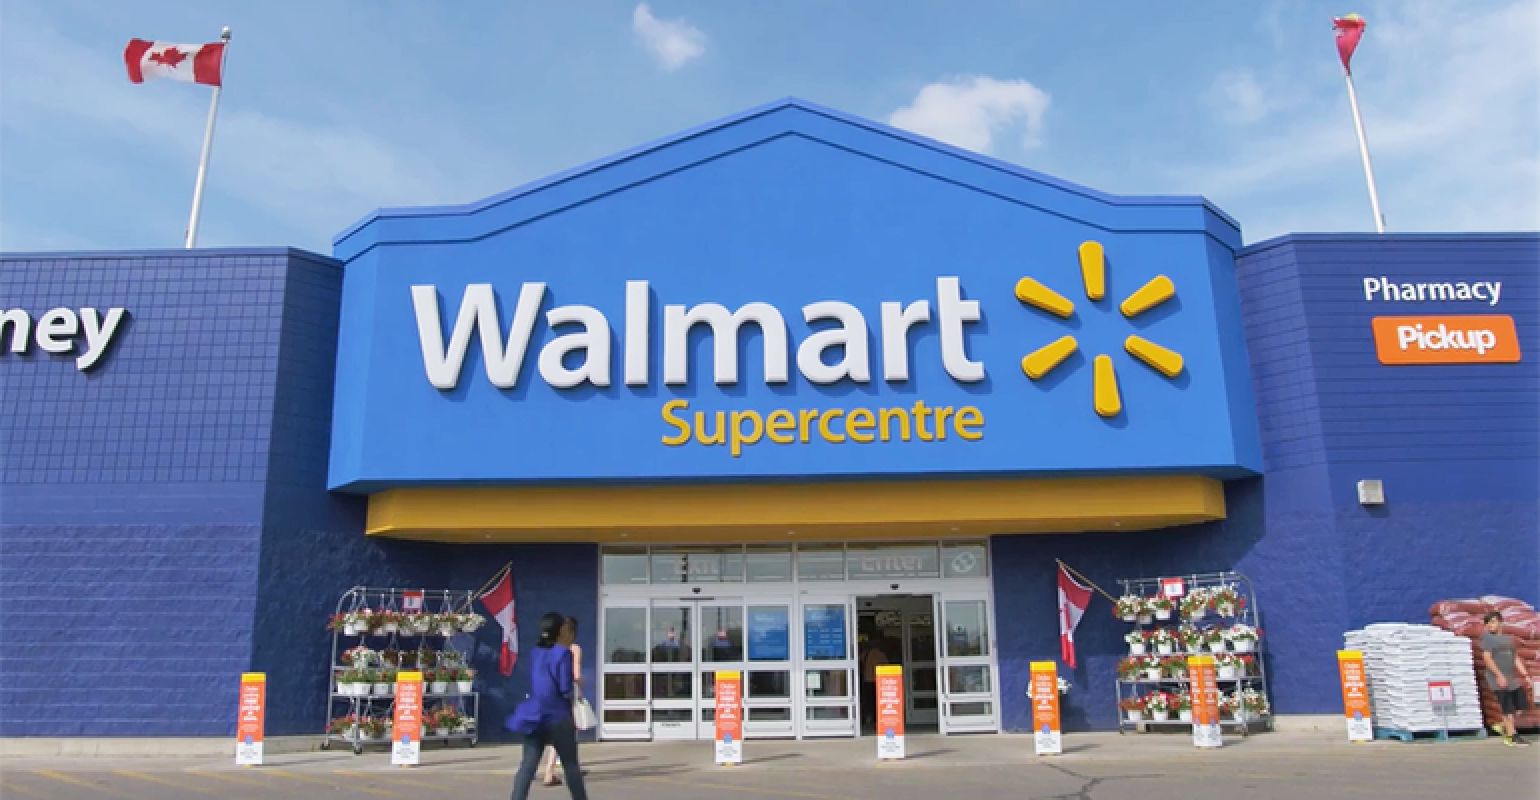

In [1]:
from IPython.display import Image
Image(filename='walmart.png', width=500, height=200)

### Tasks

- Which store has maximum sales?

- Which store/s has good quarterly growth rate in Q3’2012?

- Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together?

- Provide a monthly and semester view of sales in units and give insights?

- Forecasting Demand for Store 1

- Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

- Change dates into days by creating new variable.

In [2]:
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from tabulate import tabulate
from sklearn.preprocessing import OneHotEncoder
import shap
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.patches as mpatches

In [3]:
df = pd.read_csv('Walmart_Store_sales.csv')
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [4]:
# No missing data.
df.describe(include='all')

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   6435.000000        6435  6.435000e+03   6435.000000  6435.000000   
unique          NaN         143           NaN           NaN          NaN   
top             NaN  06-01-2012           NaN           NaN          NaN   
freq            NaN          45           NaN           NaN          NaN   
mean      23.000000         NaN  1.046965e+06      0.069930    60.663782   
std       12.988182         NaN  5.643666e+05      0.255049    18.444933   
min        1.000000         NaN  2.099862e+05      0.000000    -2.060000   
25%       12.000000         NaN  5.533501e+05      0.000000    47.460000   
50%       23.000000         NaN  9.607460e+05      0.000000    62.670000   
75%       34.000000         NaN  1.420159e+06      0.000000    74.940000   
max       45.000000         NaN  3.818686e+06      1.000000   100.140000   

         Fuel_Price          CPI  Unemployment  
count   6435.000000  6435.000000   6435.000000  
unique          NaN          NaN           NaN  
top             NaN          NaN           NaN  
freq            NaN          NaN           NaN  
mean       3.358607   171.578394      7.999151  
std        0.459020    39.356712      1.875885  
min        2.472000   126.064000      3.879000  
25%        2.933000   131.735000      6.891000  
50%        3.445000   182.616521      7.874000  
75%        3.735000   212.743293      8.622000  
max        4.468000   227.232807     14.313000

In [5]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [16]:
# Converting the Date field to a datatime.
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

#### Which store has maximum sales?
- Store 14 with $3.81 million 

In [7]:
# Here we're creating a pivot table that shows the total weekly sales amount by store. 
pivot = df.pivot_table(index=['Weekly_Sales'], values=['Store'], aggfunc='sum')
pivot

Store
Weekly_Sales       
209986.25        33
213538.32        33
215359.21        33
219804.85        33
220060.35        33
...             ...
3595903.20       13
3676388.98        4
3749057.69       10
3766687.43       20
3818686.45       14

[6435 rows x 1 columns]

In [8]:
3818686.45/1000000

3.8186864500000004

#### Which store/s has good quarterly growth rate in Q3’2012?

#### Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together?

#### Provide a monthly and semester view of sales in units and give insights?

#### Forecasting Demand for Store 1

In [18]:
store1=df[df['Store']==1][['Date','Weekly_Sales']]
store1=store1.set_index('Date')

In [22]:
model = ARIMA(store1, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
A date index has been provided, but it has no associated frequency information and s

                             ARIMA Model Results                              
Dep. Variable:         D.Weekly_Sales   No. Observations:                  142
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1893.251
Method:                       css-mle   S.D. of innovations         148809.033
Date:                Mon, 05 Jul 2021   AIC                           3800.503
Time:                        15:55:58   BIC                           3821.194
Sample:                             1   HQIC                          3808.911
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1056.5574   5470.151     -0.193      0.847   -1.18e+04    9664.742
ar.L1.D.Weekly_Sales    -0.4773      0.083     -5.773      0.000      -0.639      -0.315
ar.L2.D.Week

In [27]:
model_fit.resid

Date
2010-12-02      -676.902556
2010-02-19    -29185.121602
2010-02-26   -214877.676154
2010-05-03     20411.379575
2010-12-03   -121314.704584
                  ...      
2012-09-28   -126773.658637
2012-05-10    157005.453961
2012-12-10      8495.573242
2012-10-19    -60194.723104
2012-10-26       948.511219
Length: 142, dtype: float64

In [28]:
X = store1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(6,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)



predicted=1564831.198592, expected=2033320.660000
predicted=2024698.401973, expected=1584083.950000
predicted=1698357.722835, expected=1799682.380000
predicted=1762831.064148, expected=1881176.670000
predicted=2104709.079137, expected=2270188.990000
predicted=2003122.757065, expected=1497462.720000
predicted=1878205.323410, expected=1550369.920000
predicted=1748040.012604, expected=1459601.170000
predicted=1592186.254815, expected=1394393.840000
predicted=1114299.531724, expected=1319325.590000
predicted=1318767.457780, expected=1636339.650000
predicted=1480680.929131, expected=1802477.430000
predicted=1467696.938367, expected=1819870.000000
predicted=1821162.775005, expected=1539387.830000
predicted=1721193.903201, expected=1688420.760000
predicted=1731753.864090, expected=1675431.160000
predicted=1722260.959531, expected=1677472.780000
predicted=1664893.078737, expected=1511068.070000
predicted=1643590.939687, expected=1649604.630000
predicted=1585426.910071, expected=1899676.880000


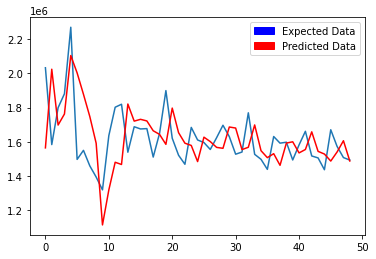

In [11]:
# Plotting the Graph
plt.plot(test)
plt.plot(predictions, color='red')
red_patch = mpatches.Patch(color='red', label='Predicted Data')
blue_patch = mpatches.Patch(color='blue', label='Expected Data')
plt.legend(handles=[blue_patch,red_patch])
plt.show()